In [2]:
import pandas as pd
import numpy as np
from numpy import NaN, NAN, nan
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.0f}'.format

In [3]:
df = pd.read_excel('../Outputs/GIS_Lump_Excels/Lump0816_365_515_Mataranka.xlsx')

#change 08 and 16 to strings
df['CODE_08'] = df['LU_NO'].astype(str)
df['CODE_16'] = df['LU_CODEN'].astype(str)

# make the new columns for LU08 using string indexing
df['prim_08'] = df['CODE_08'].str[0:1]
df['secon_08'] = df['CODE_08'].str[:2]
df['third_08'] = df['CODE_08'].str[0:3]

# make the new columns for LU16 using string indexing
df['prim_16'] = df['CODE_16'].str[0:1]
df['secon_16'] = df['CODE_16'].str[:2]
df['third_16'] = df['CODE_16'].str[0:3]

#change 08 and 16 to intigers
df['seconint_16'] = df['secon_16'].astype(int)
df['seconint_08'] = df['secon_08'].astype(int)

#convet area to ha
df['AREA_08_ha'] = (df['AREA_08_M2'] / 10000).astype(int)
df['AREA_16_ha'] = (df['AREA_16_M2'] / 10000).astype(int)

# Group by land use and calculate the sum of area
df16 = df.groupby('seconint_16')['AREA_16_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

df8 = df.groupby('seconint_08')['AREA_08_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

#dflabel = df.groupby('secon_16')['AREA_16_M2'].agg([
    #np.sum,
    #np.mean,
    #np.count_nonzero,]).reset_index()
    

#Change the column names so that they can be concatinated
df16.columns = ['Land Use', 'Sum', 'Mean', 'Std', 'Count non zero']
df8.columns = ['Land Use', 'Sum', 'Mean', 'Std','Count non zero']


concat = pd.concat([df16, df8])

final = pd.merge(df16, df8,
                left_on='Land Use', right_on='Land Use',
                how = 'left')

#Change the column names so for analysis
final.columns = ['Land Use', 'Sum 2016', 'Mean 2016', 'Std 2016', 'Count 2016',
              'Sum 2008', 'Mean 2008', 'Std 2008', 'Count 2008']

final['Change Sum'] = (final['Sum 2016'] - final['Sum 2008'])


final= final[['Land Use', 'Sum 2008', 'Mean 2008', 'Std 2008', 'Count 2008',
                  'Sum 2016', 'Mean 2016', 'Std 2016', 'Count 2016', 'Change Sum']]

final.to_excel('../Outputs/Pandas_Lump_Excels/Marrakai_Grouped_Lump0816_365_515.xlsx')
final

,Land Use,Sum 2008,Mean 2008,Std 2008,Count 2008,Sum 2016,Mean 2016,Std 2016,Count 2016,Change Sum
0,41,nan,nan,nan,nan,850,850,nan,1,nan
1,44,nan,nan,nan,nan,312,26,40,9,nan
2,45,nan,nan,nan,nan,800,89,36,9,nan
3,46,nan,nan,nan,nan,3,3,nan,1,nan


comparison

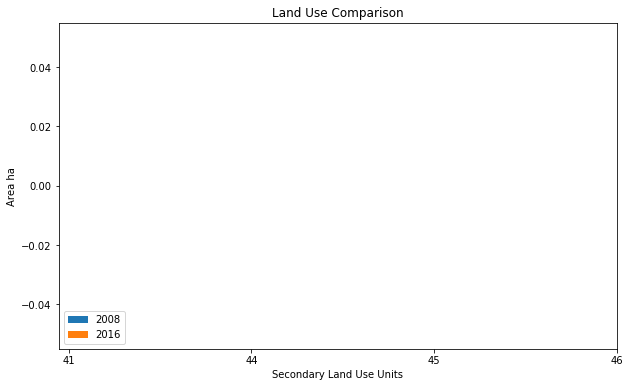

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
plt.rcParams['figure.figsize']=(10,6
                            )
#Sum2008 = final['Sum 2008']
Sum2016 = final['Sum 2016']

ind = np.arange(N)    # the x locations for the groups
width = 0.50
# the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Sum2008, width,)
#p2 = plt.bar(ind, Sum2016, width,
#             bottom=Sum2008,)

plt.ylabel('Area ha')
plt.title('Land Use Comparison')
plt.xticks(ind, final['Land Use'])
plt.xlabel('Secondary Land Use Units')
plt.legend((p1[0], p2[0]), ('2008', '2016'))

plt.show()

In [11]:

#grouped by commodity only
df16_comod = df.groupby('COMMOD_DES')['AREA_16_ha'].agg(np.sum).reset_index()

df8_comod = df.groupby('COMMOD_DES')['AREA_08_ha'].agg(np.sum).reset_index()

#Change the column names so that they can be concatinated
df16_comod.columns = ['Commodity', 'Sum']
df8_comod.columns = ['Commodity', 'Sum']

concat = pd.concat([df16_comod, df8_comod])

final_comod = pd.merge(df16_comod, df8_comod,
                left_on='Commodity', right_on='Commodity',
                how = 'left')

#Change the column names so for analysis
final_comod.columns = ['Commodity', 'Sum 2016','Sum 2008']

#reorder the table
final_comod = final_comod[['Commodity', 'Sum 2008', 'Sum 2016']]


#calculate %area change and %count count change
final_comod['Change Sum'] = (final_comod['Sum 2016'] - final_comod['Sum 2008'])
final_comod=final_comod[1:]
final_comod  

,Commodity,Sum 2008,Sum 2016,Change Sum
1,mangoes,0,317,317
2,melons,0,798,798
3,sandalwood,0,850,850


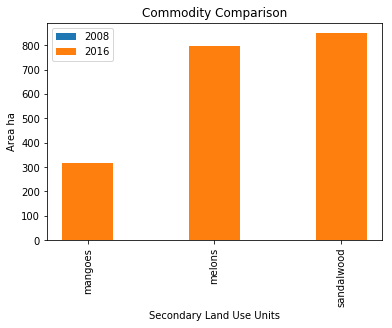

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(6,4)
N = 3

Sum2008 = final_comod['Sum 2008']
Sum2016 = final_comod['Sum 2016']

ind = np.arange(N)    # the x locations for the groups
width = 0.40      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Sum2008, width,)
p2 = plt.bar(ind, Sum2016, width,
             bottom=Sum2008,)

plt.ylabel('Area ha')
plt.title('Commodity Comparison')
plt.xticks(ind, final_comod['Commodity'], rotation = 'vertical')
plt.xlabel('Secondary Land Use Units')
plt.legend((p1[0], p2[0]), ('2008', '2016'))

plt.show()

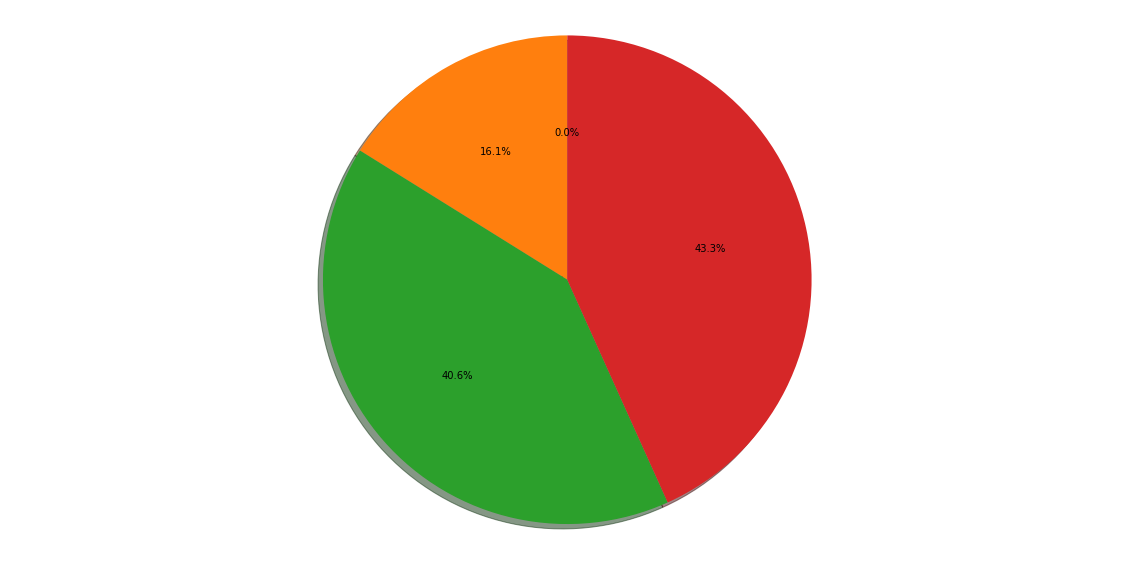

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
labels = final_comod['Commodity']
area = final_comod['Sum 2016']
fig1, ax1 = plt.subplots()
ax1.pie(area, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
